In [2]:
import pandas as pd

data = pd.DataFrame({'Math':[70,60,40,80,30],
                    'chemistry':[60,80,65,55,60],
                    'Maths':[70,60,40,80,30],
                    'physics':[50,50,50,50,50],
                     'General':[70,70,60,60,80]})

print(data)

   Math  chemistry  Maths  physics  General
0    70         60     70       50       70
1    60         80     60       50       70
2    40         65     40       50       60
3    80         55     80       50       60
4    30         60     30       50       80


Variance

In [5]:
from sklearn.feature_selection import VarianceThreshold
selector= VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)

In [6]:
data = pd.DataFrame(selected_features,columns=selector.get_feature)

array([[70, 60, 70, 70],
       [60, 80, 60, 70],
       [40, 65, 40, 60],
       [80, 55, 80, 60],
       [30, 60, 30, 80]])

Correlation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cor = data.corr()
cor

,Math,chemistry,Maths,physics,General
Math,1.000000,-0.150424,1.000000,NaN,-0.489932
chemistry,-0.150424,1.000000,-0.150424,NaN,0.124274
Maths,1.000000,-0.150424,1.000000,NaN,-0.489932
physics,NaN,NaN,NaN,NaN,NaN
General,-0.489932,0.124274,-0.489932,NaN,1.000000


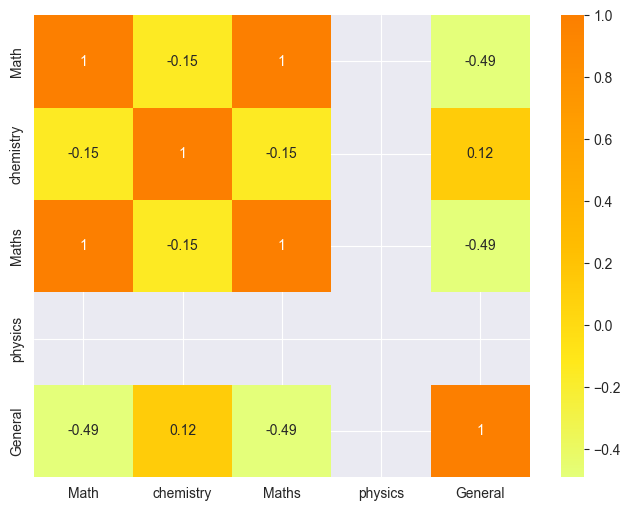

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True, cmap='Wistia')
plt.show()

In [12]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [13]:
corr_features

{'Maths'}

In [14]:
data = data.drop(corr_features,axis=1)
data

,Math,chemistry,physics,General
0,70,60,50,70
1,60,80,50,70
2,40,65,50,60
3,80,55,50,60
4,30,60,50,80
